In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
import glob

In [2]:
raw_data_path = os.path.join('', '')
#all_files = glob.glob(raw_data_path +"/top_songs_with_lyrics.csv")
#lyrics_df = pd.concat(pd.read_csv(f) for f in all_files)
lyrics_df = pd.read_csv('top_songs_with_lyrics.csv')
columnLyric='lyric'

In [3]:
lyrics_df = lyrics_df[lyrics_df[columnLyric].isnull()==False]
lyrics_df = lyrics_df[lyrics_df['clase'].isnull()==False]####


PREPROCESING

In [4]:
!pip3 install es_core_news_md
!python -m spacy download es_core_news_md
#import spacy
#nlp = spacy.load('es_core_news_md')

ERROR: Could not find a version that satisfies the requirement es_core_news_md (from versions: none)
ERROR: No matching distribution found for es_core_news_md
     |████████████████████████████████| 78.4MB 1.2MB/s 
  Created wheel for es-core-news-md: filename=es_core_news_md-2.2.5-cp36-none-any.whl size=79649483 sha256=11d5a18fff493ad95efc6957d9e7ba51b55b3076cb14817de92bbb7dc58a06dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ya8jlt08/wheels/b7/bb/a3/29ab5cf80c2c0a8fa0f2af8402fdace3f159e8265f0fdcbcdb
Successfully built es-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [5]:
import re
import string

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

import es_core_news_md

nlp = es_core_news_md.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import spacy
import es_core_news_md

nlp = es_core_news_md.load()
#doc = nlp("ahora todo cambió le toca a ella latino gang  ayer la vi perreando solita  se ve má bonita ahora que no está")
#for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

In [7]:
##  Lematizacion  
##  remover acentos 
##  StopWords

def lemmatize(lyric):
    tk = nlp(lyric)
    tk_lemmatize = ""
    for word in tk:
        tk_lemmatize = tk_lemmatize +" "+word.lemma_
    return tk_lemmatize
    

def token_clean_stopwords(message):
    stop_words = stopwords.words('spanish') + stopwords.words('english')
    more_stopwords = ['rhythm','ovy','ay','hey','woh','si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo','ma']
    total_stopwords = stop_words + more_stopwords

    text_token_stopwords = [word for word in message.split() if ((word.lower() not in total_stopwords) and (len(word)>4))]
    #Para pruebas con Bert
    #total_sentence=""
#    for word in message.split():
#        if ((word.lower() not in total_stopwords) and (len(word)>4)):
#            total_sentence = total_sentence + word.lower()+' ';
    #return total_sentence
    return text_token_stopwords

def remove_puntuation(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    return Test_punc_removed_join

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_str_puntuaction(input_df):
    input_df=input_df.replace("'","")
    input_df=input_df.replace("\r"," ")
    input_df=input_df.replace("\n"," ")
    input_df=input_df.replace("-"," ")
    input_df= re.sub("[\(\[].*?[\)\]]", "", input_df)
    input_df= re.sub(r'[^\w\s]', '', input_df)
    input_df= re.sub(r'me ', ' ', input_df)
    input_df= re.sub(r'te ', ' ', input_df)
    #input_df= remove_accents(input_df)
    return input_df

def clean_lyric(input_lyric):
    input_lyric =input_lyric.lower()
    input_lyric = clean_str_puntuaction(input_lyric)
    #input_lyric = remove_puntuation(input_lyric)
    input_lyric = lemmatize(input_lyric)
    input_lyric = remove_accents(input_lyric)
    input_lyric = lemmatize(input_lyric)
    
    input_lyric = token_clean_stopwords(input_lyric)

    return input_lyric

# Vectorizar texto sin preprocesar

In [8]:
# Texto sin preprocesar
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = clean_lyric)
lyrics_countvectorizer = vectorizer.fit_transform(lyrics_df['lyric'])

In [9]:
print(vectorizer.get_feature_names())

['aaron', 'abajar', 'abandonar', 'abismar', 'abogar', 'abolengo', 'abonero', 'aborrecer', 'abrasar', 'abrasarlo', 'abrazar', 'abrazarla', 'abrazarlo', 'abrigar', 'abrigarla', 'abril', 'abrir', 'abris', 'absolutamen', 'absorber', 'absurdo', 'abuelo', 'aburricion', 'aburrimiento', 'aburrir', 'abusador', 'abusar', 'acabamo', 'acabandose', 'acabar', 'acabarse', 'acalambrar', 'acapulco', 'acariciale', 'acariciar', 'acarina', 'acaso', 'acceso', 'accion', 'acelerador', 'aceleralo', 'acelerar', 'acentuar', 'aceptalo', 'aceptar', 'aceptarlo', 'acerar', 'acercar', 'aclamar', 'aclarar', 'aclararle', 'acomodar', 'acomodese', 'acompana', 'acompanar', 'acompleta', 'aconsejale', 'aconsejar', 'acoplar', 'acordar', 'acordeon', 'acordeonar', 'acorralar', 'acortar', 'acosar', 'acostar', 'acostas', 'acostumbrar', 'actitu', 'actitud', 'activar', 'actuar', 'acudir', 'acuerdense', 'acumele', 'acumular', 'acurrucar', 'addicted', 'adelan', 'adelantar', 'ademar', 'adentrar', 'adeveras', 'adherir', 'adiccion', '

In [10]:
print(lyrics_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Ejecutar desde aquí 

In [11]:

lyrics = pd.DataFrame(lyrics_countvectorizer.toarray())

lyrics.reset_index(drop=True, inplace=True)


In [12]:
X = lyrics
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5021,5022,5023,5024,5025,5026,5027,5028,5029,5030,5031,5032,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
856,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
X.shape


(858, 5061)

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5021,5022,5023,5024,5025,5026,5027,5028,5029,5030,5031,5032,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:

y=lyrics_df['clase']


In [16]:
y.shape

(858,)

In [17]:
#Dividir el dataset en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#se divide el 80 del set para validación y que quede 60,20,20
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.25) 

#train= train1 + valid


# Funcion mostrar resultados

In [18]:
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()
    print (classification_report(y_test, pred_y))

# Probar distintos Algoritmos

# Naive Bayes

In [19]:
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB(alpha=3.0, class_prior=None, fit_prior=False)
NB_classifier.fit(X_train, y_train)
score = NB_classifier.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(NB_classifier, X_train, y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.8483965014577259
Metricas cross_validation [0.67248908 0.66375546 0.70614035]
Media de cross_validation 0.6807949641206363


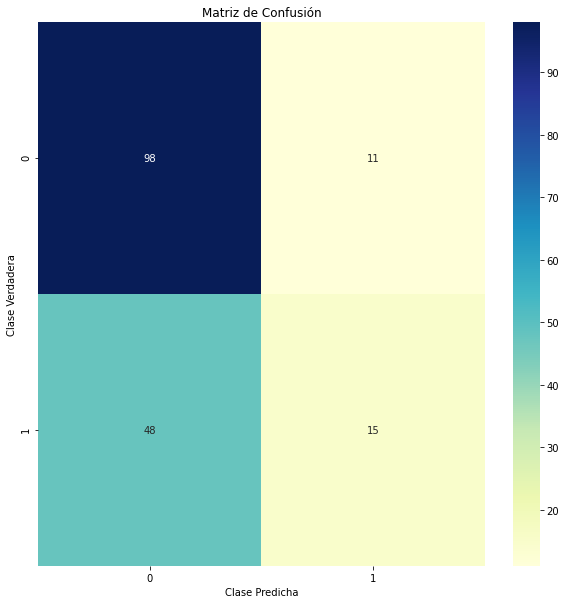

              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       109
         1.0       0.58      0.24      0.34        63

    accuracy                           0.66       172
   macro avg       0.62      0.57      0.55       172
weighted avg       0.64      0.66      0.61       172



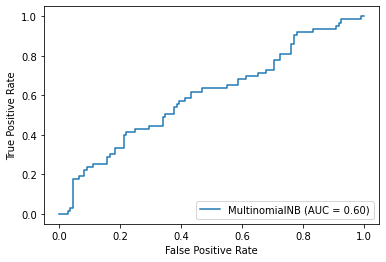

In [20]:
# Cambiar nombre del clasificador
y_predict_test = NB_classifier.predict(X_test)
mostrar_resultados(y_test, y_predict_test)
metrics.plot_roc_curve( NB_classifier , X_test , y_test)  # doctest: +SKIP
plt.show()


# Random Forest

In [21]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV###
from sklearn.model_selection import StratifiedKFold###

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [35,40, 45],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 3, 2],
               'min_samples_split': [20, 25, 10],
               'n_estimators': [200, 300, 400, 450 ],
               'random_state':[None]}

clf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=3)
rndmf = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = skf, verbose= 5, n_jobs = -1)
rndmf.fit(X_train ,y_train)###de acuerdo al diagrama se usará valid y train para elegir el mejor modelo 

predictionforest = rndmf.best_estimator_.predict(X_valid)#se usará para competir 
print(confusion_matrix(y_valid,predictionforest))
print(classification_report(y_valid,predictionforest))

#______________________________________________________

#rndmf = RandomForestClassifier(max_depth= 20, random_state= 0)
#rndmf= rndmf.fit(X_train, y_train)
#tree.plot_tree(rndmf.best_estimator_, filled = True)
#plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 12.1min finished


[[124   0]
 [ 26  22]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       124
         1.0       1.00      0.46      0.63        48

    accuracy                           0.85       172
   macro avg       0.91      0.73      0.77       172
weighted avg       0.88      0.85      0.83       172



In [22]:
score = rndmf.best_estimator_.score(X_test, y_test)####estaba: rndmf.score(X_train, y_train)
print("Metrica del modelo", score)
scores = cross_val_score(rndmf.best_estimator_, X_test, y_test, cv=skf, scoring="accuracy") 
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.6453488372093024
Metricas cross_validation [0.63793103 0.63157895 0.63157895]
Media de cross_validation 0.6336963097398669


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


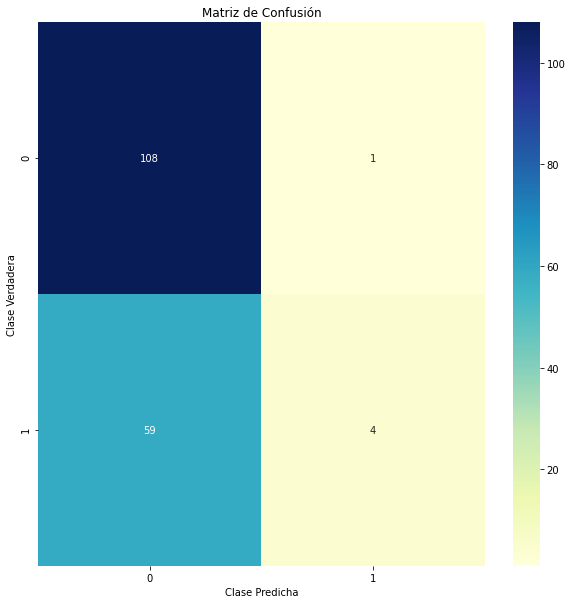

              precision    recall  f1-score   support

         0.0       0.65      0.99      0.78       109
         1.0       0.80      0.06      0.12        63

    accuracy                           0.65       172
   macro avg       0.72      0.53      0.45       172
weighted avg       0.70      0.65      0.54       172



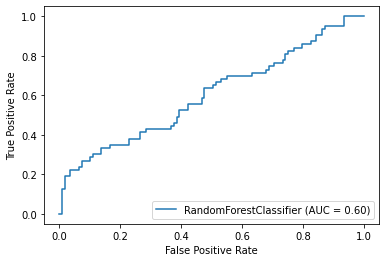

In [23]:
#presentamos resulados y mejores parámetros 
print(rndmf.best_estimator_)
bestrndmf= rndmf.best_estimator_.fit(X_train ,y_train)
y_predict_test = bestrndmf.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

metrics.plot_roc_curve( rndmf.best_estimator_ , X_test , y_test)

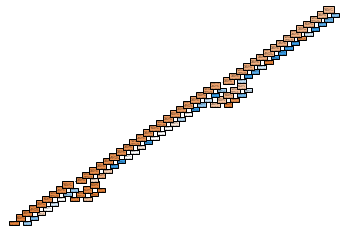

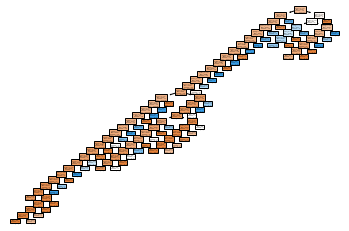

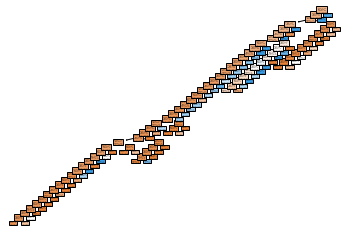

In [24]:
tree.plot_tree(rndmf.best_estimator_[28], filled = True)
plt.show()

tree.plot_tree(rndmf.best_estimator_[20], filled = True)
plt.show()

tree.plot_tree(rndmf.best_estimator_[10], filled = True)
plt.show()

# Decision Tree 

In [25]:
# Poner algoritmo aqui
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = tree.DecisionTreeClassifier(criterion='gini',
                                   #min_samples_split=20,
                                   min_samples_leaf=5,
                                   max_depth = 30,
                                   class_weight={1:4})
tree = tree.fit(X_train, y_train)

#tree.plot_tree(arbol, filled= True)
#plt.show()
score = tree.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(tree, X_train, y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.8323615160349854
Metricas cross_validation [0.60262009 0.56768559 0.51754386]
Media de cross_validation 0.5626165121683394


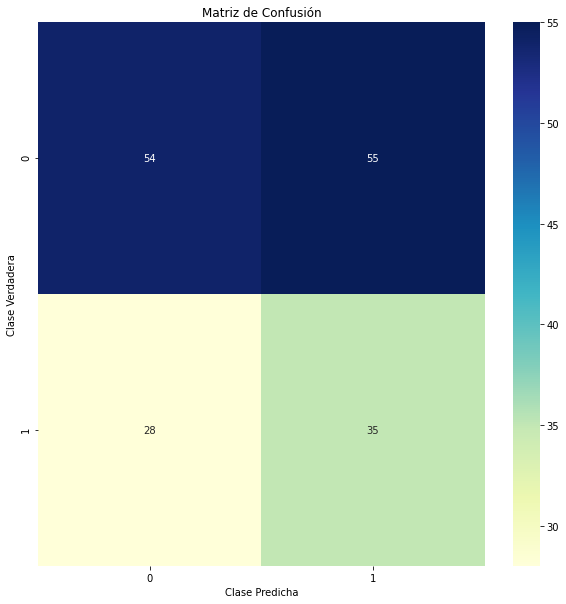

              precision    recall  f1-score   support

         0.0       0.66      0.50      0.57       109
         1.0       0.39      0.56      0.46        63

    accuracy                           0.52       172
   macro avg       0.52      0.53      0.51       172
weighted avg       0.56      0.52      0.53       172



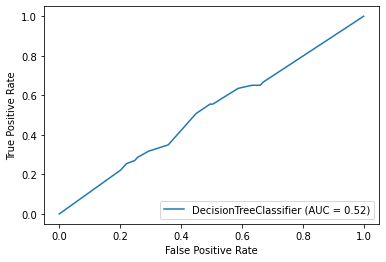

In [26]:
y_predict_test = tree.predict(X_test)
mostrar_resultados(y_test, y_predict_test)
metrics.plot_roc_curve( tree , X_test , y_test)

## SVM

In [27]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

score = clf_svm.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(clf_svm, X_train, y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metrica del modelo 0.814868804664723
Metricas cross_validation [0.69868996 0.70305677 0.69736842]
Media de cross_validation 0.6997050486478203


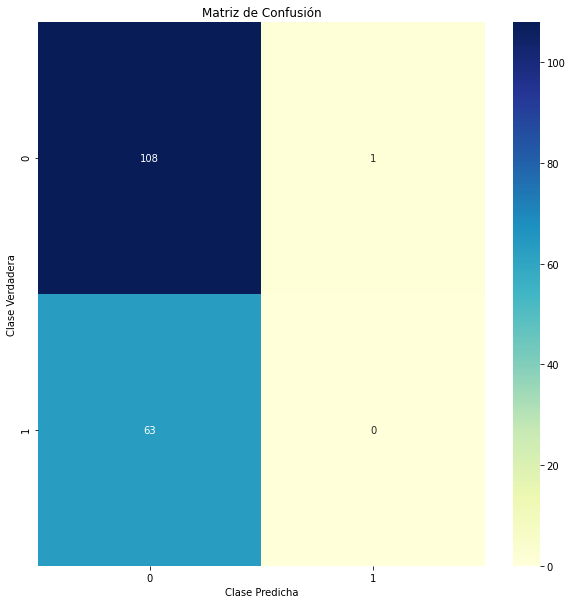

              precision    recall  f1-score   support

         0.0       0.63      0.99      0.77       109
         1.0       0.00      0.00      0.00        63

    accuracy                           0.63       172
   macro avg       0.32      0.50      0.39       172
weighted avg       0.40      0.63      0.49       172



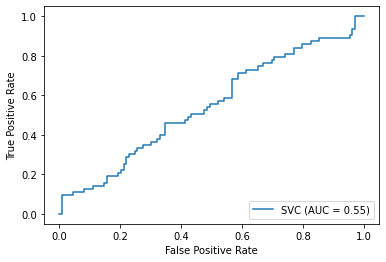

In [28]:
y_predict_test = clf_svm.predict(X_test)
mostrar_resultados(y_test, y_predict_test)
metrics.plot_roc_curve( clf_svm , X_test , y_test)

## SGD Classifier

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV###
from sklearn.model_selection import StratifiedKFold###

grid_search = {'loss' :['hinge'], 
               'penalty':['l2'],
               'alpha':[0.0001, 0.1], 
               'l1_ratio' : [0.15, .1], 
               'fit_intercept' : [True], 
               'max_iter': [1000], 
               'tol': [0.001], 
               'shuffle':[True], 
               'verbose':[0], 
               #'epsilon': [DEFAULT_EPSILON], 
               'n_jobs':[None], 
               'random_state':[None], 
               'learning_rate':['optimal'], 
               'eta0':[0.0], 
               'power_t':[0.5], 
               'early_stopping':[False], 
               'validation_fraction':[0.1], 
               'n_iter_no_change':[5], 
               'class_weight':[None], 
               'warm_start':[False], 
               'average':[False]
               }

clf_sgd = SGDClassifier()
#clf_sgd.fit(X_train, y_train)
skf = StratifiedKFold(n_splits=3)
sgdc = GridSearchCV(estimator = clf_sgd, 
                    param_grid = grid_search,
                    cv = skf)
                    #verbose=0,
                    #n_jobs = -1)
sgdc.fit(X_train ,y_train)###de acuerdo al diagrama se usará valid y train para elegir el mejor modelo 

predictionsgdc = sgdc.best_estimator_.predict(X_valid)#se usará para competir 
print(confusion_matrix(y_valid,predictionsgdc))
print(classification_report(y_valid,predictionsgdc))



score = sgdc.best_estimator_.score(X_train, y_train)
print("Metrica del modelo", score)
skf = StratifiedKFold(n_splits=3)
scores = cross_val_score(sgdc.best_estimator_, X_train, y=y_train, cv=skf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())




[[121   3]
 [ 10  38]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       124
         1.0       0.93      0.79      0.85        48

    accuracy                           0.92       172
   macro avg       0.93      0.88      0.90       172
weighted avg       0.92      0.92      0.92       172

Metrica del modelo 0.9271137026239067
Metricas cross_validation [0.65938865 0.64628821 0.62280702]
Media de cross_validation 0.6428279578130187


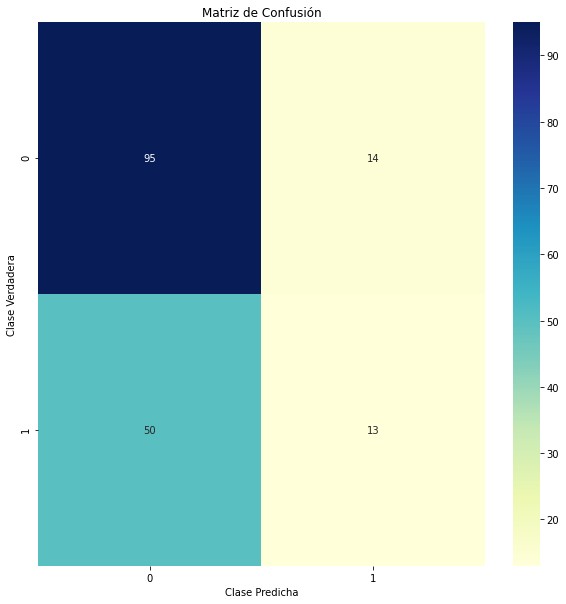

              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75       109
         1.0       0.48      0.21      0.29        63

    accuracy                           0.63       172
   macro avg       0.57      0.54      0.52       172
weighted avg       0.59      0.63      0.58       172



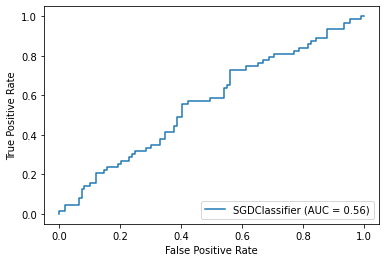

In [30]:
y_predict_test = sgdc.best_estimator_.predict(X_test)
mostrar_resultados(y_test, y_predict_test)

metrics.plot_roc_curve(sgdc.best_estimator_ , X_test , y_test)

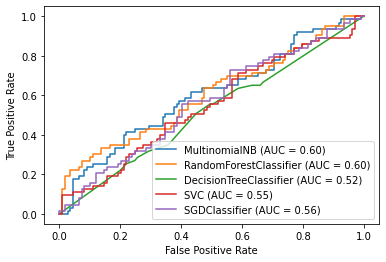

In [31]:
NBDISP=metrics.plot_roc_curve( NB_classifier , X_test , y_test)  
RFDISP=metrics.plot_roc_curve( rndmf.best_estimator_ , X_test , y_test, ax= NBDISP.ax_)  
TREEDISP=metrics.plot_roc_curve( tree , X_test , y_test, ax= RFDISP.ax_)  
SVMDISP=metrics.plot_roc_curve( clf_svm , X_test , y_test, ax= TREEDISP.ax_)  
SGDISP=metrics.plot_roc_curve( sgdc.best_estimator_ , X_test , y_test, ax= SVMDISP.ax_)  
                         
plt.show()
